In [52]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [12]:
# data as of 7/15/2021
leaderboard <- read.csv("C:/Users/kgtrm/Documents/VSC Code/API Stuff/SMSLeaderboard.csv")

head(leaderboard)
str(leaderboard)

,place,date,verification_status,emulator,platform,region,realtime
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,2021-07-10,verified,False,v06dk3e4,o316x197,4403
2,2,2020-06-28,verified,False,v06dk3e4,o316x197,4424
3,3,2021-05-30,verified,False,v06dk3e4,o316x197,4439
4,4,2019-12-28,verified,False,v06dk3e4,o316x197,4453
5,5,2021-05-26,verified,False,v06dk3e4,o316x197,4454
6,6,2020-06-06,verified,False,v06dk3e4,o316x197,4462


'data.frame':	1313 obs. of  7 variables:
 $ place              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date               : chr  "2021-07-10" "2020-06-28" "2021-05-30" "2019-12-28" ...
 $ verification_status: chr  "verified" "verified" "verified" "verified" ...
 $ emulator           : chr  "False" "False" "False" "False" ...
 $ platform           : chr  "v06dk3e4" "v06dk3e4" "v06dk3e4" "v06dk3e4" ...
 $ region             : chr  "o316x197" "o316x197" "o316x197" "o316x197" ...
 $ realtime           : num  4403 4424 4439 4453 4454 ...


In [16]:
# let's change the attributes to more appropriate data types
leaderboard$date <- as.Date(leaderboard$date)
leaderboard$emulator <- ifelse(leaderboard$emulator == "False", FALSE, TRUE)

head(leaderboard)

,place,date,verification_status,emulator,platform,region,realtime
,<int>,<date>,<chr>,<lgl>,<chr>,<chr>,<dbl>
1,1,2021-07-10,verified,FALSE,v06dk3e4,o316x197,4403
2,2,2020-06-28,verified,FALSE,v06dk3e4,o316x197,4424
3,3,2021-05-30,verified,FALSE,v06dk3e4,o316x197,4439
4,4,2019-12-28,verified,FALSE,v06dk3e4,o316x197,4453
5,5,2021-05-26,verified,FALSE,v06dk3e4,o316x197,4454
6,6,2020-06-06,verified,FALSE,v06dk3e4,o316x197,4462


In [41]:
summary(leaderboard$realtime)

today <- as.Date("2021-07-16")
cur_max = 0
# difference <- as.numeric(today - leaderboard[1,2])
# difference
# difference > cur_max
for (i in 1:nrow(leaderboard)) {
    difference <- as.numeric(today - leaderboard[i,2])
    if (!is.na(difference)) {
        if (difference > cur_max) {
            oldest_index <- i
            cur_max <- difference
        }
    }
}

leaderboard[oldest_index,]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4403    5269    6174    7064    7505   86627 

,place,date,verification_status,emulator,platform,region,realtime
,<int>,<date>,<chr>,<lgl>,<chr>,<chr>,<dbl>
852,852,2008-12-05,verified,FALSE,4p9z06rn,,6950


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4403    5264    6153    6750    7435   20064 

Warning message:
"Removed 42 rows containing missing values (geom_point)."


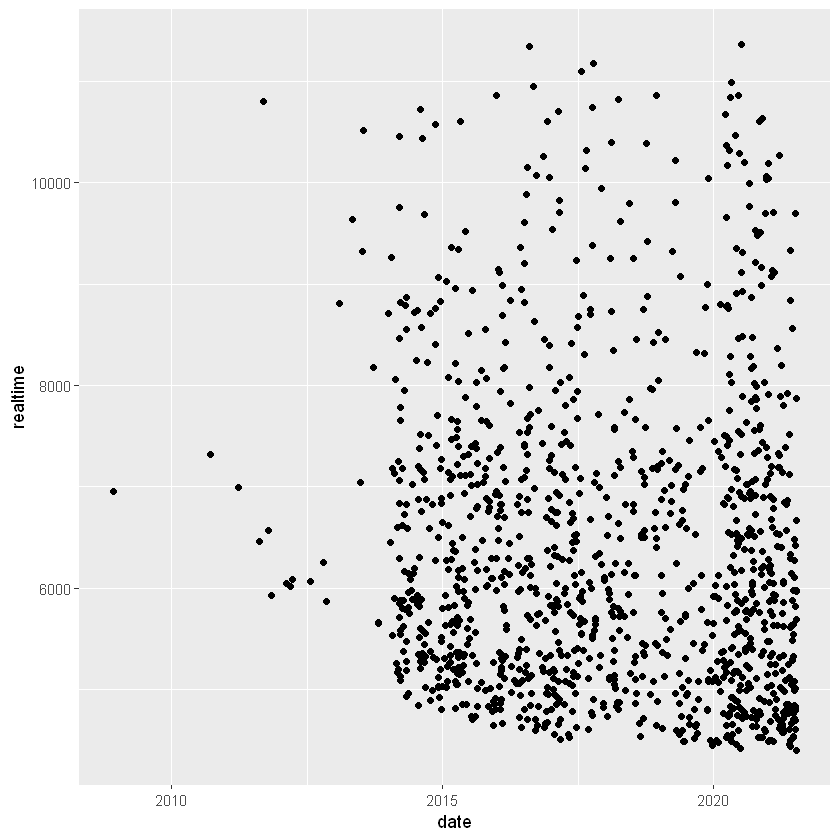

In [83]:

without_top_5 <- leaderboard[leaderboard$realtime < quantile(leaderboard$realtime, 0.95),]
summary(without_top_10$realtime)

ggplot(data = without_top_5, aes(x = date, y = realtime)) +
    geom_point()

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


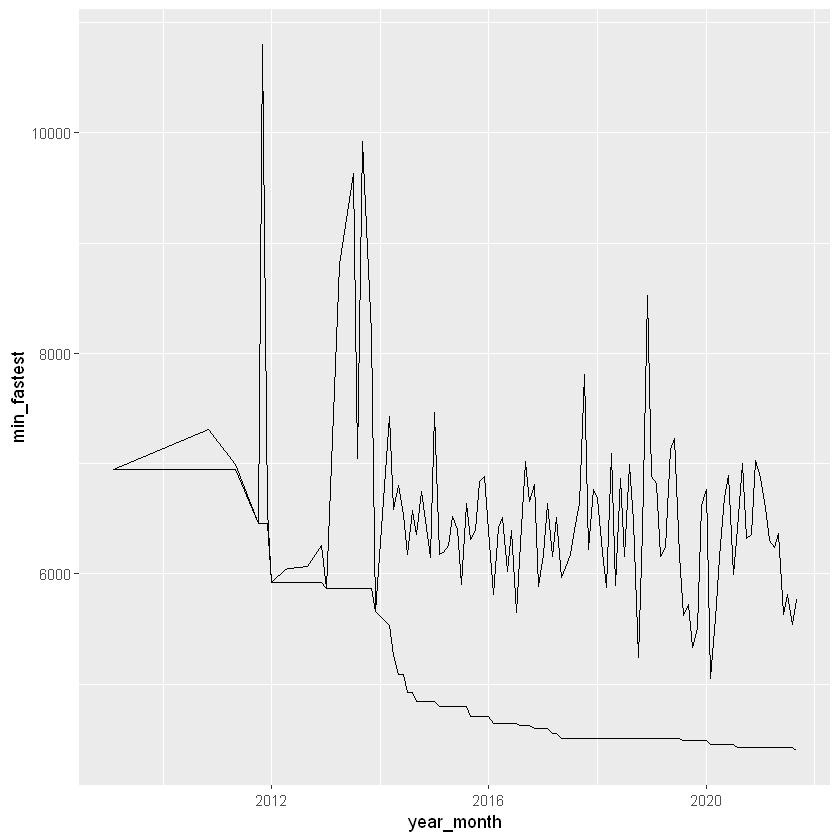

In [84]:
leaderboard_1 <- without_top_5 %>%
    mutate(month = month(without_top_5$date),
           day = day(without_top_5$date),
           year = year(without_top_5$date),
          year_month = year + ((month + 1) / 12))

stats_by_months_years <- leaderboard_1 %>%
    group_by(year_month) %>%
    summarize(fastest = min(realtime, na.rm = TRUE),
             mean_time = mean(realtime, na.rm = TRUE))

stats_by_months_years$min_fastest <- cummin(stats_by_months_years$fastest)

# stats_by_months_years

ggplot(data = stats_by_months_years, aes(x = year_month)) +
    geom_line(aes(y = min_fastest)) +
    geom_line(aes(y = mean_time))